# RestauAnalytics


### Dieudonne Ouedraogo

01/21/2019

* Context

Most people in NYC eat outside of their homes and restaurants provide for their needs. Even though the DOHMH monitor restaurants activities and provides grades, this informations is not enough to help people make a better decision when it comes to their food.
RestauAnalytics aims to provide more transparency to users so they can have more confidence when choosing a restaurant. Score and grades provided by DOHMH are predicted based on some meaning features accessible by the user.


Need: provide an application that extracts more meaning information providing easy decision making to the user

* Vision

Predict score and grade based on violation types and some occurrences.

* Outcome 

An interactive application providing users metrics on restaurants 

Data source and acquisition:
The data used in the application was made available and updated on 1/21/2019 by DOHMH

https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/data


The additional data source used is from Yelp reviews dataset

https://www.yelp.com/dataset

### Initial EDA:



### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import datetime 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

* I downloaded the data from

https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/data

* More data from yelp will be added later

In [26]:
my_data=pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [27]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385124 entries, 0 to 385123
Data columns (total 18 columns):
CAMIS                    385124 non-null int64
DBA                      384734 non-null object
BORO                     385124 non-null object
BUILDING                 384884 non-null object
STREET                   385120 non-null object
ZIPCODE                  379203 non-null float64
PHONE                    385121 non-null object
CUISINE DESCRIPTION      385124 non-null object
INSPECTION DATE          385124 non-null object
ACTION                   384014 non-null object
VIOLATION CODE           379276 non-null object
VIOLATION DESCRIPTION    377256 non-null object
CRITICAL FLAG            385124 non-null object
SCORE                    366070 non-null float64
GRADE                    194586 non-null object
GRADE DATE               193010 non-null object
RECORD DATE              385124 non-null object
INSPECTION TYPE          384014 non-null object
dtypes: float64(2), int6

### Grades and scores play an important role in this dataset
### Let's pull them out 

In [28]:
# Takes forever to run !
#my_data.GRADE.hist(figsize = (15, 4))
#plt.title("Histogram of the Grades", fontsize=14)
#plt.xlabel('Grades', fontsize = 10)

Text(0.5, 1.0, 'Distribution Plot of the Scores')

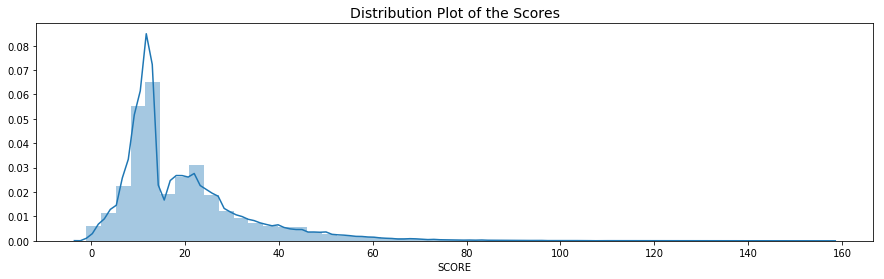

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(my_data.SCORE.dropna())
plt.title("Distribution Plot of the Scores", fontsize=14)

Text(0.5, 1.0, 'Boxplot by Grade')

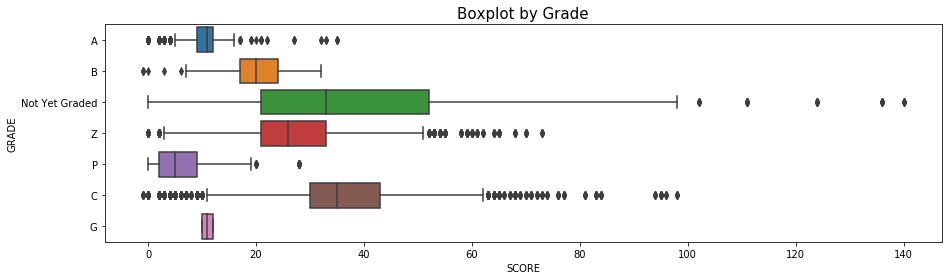

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(my_data.SCORE.dropna(), my_data.GRADE)
plt.title('Boxplot by Grade', fontsize = 15)

### Number of inspections per borough

In [31]:
my_data.BORO.value_counts()

MANHATTAN        152256
BROOKLYN          98004
QUEENS            87170
BRONX             34278
STATEN ISLAND     13302
Missing             114
Name: BORO, dtype: int64

Text(0.5, 1.0, 'Boxplot by Borough')

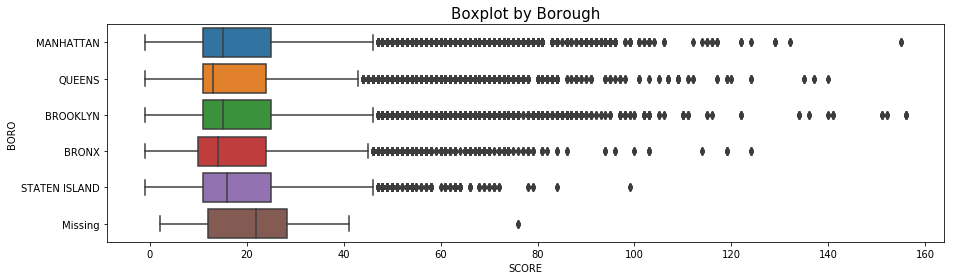

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(my_data.SCORE.dropna(), my_data.BORO)
plt.title('Boxplot by Borough', fontsize = 15)

### Violation types

In [33]:
tab = pd.crosstab(my_data['ACTION'], my_data['GRADE'])
tab[['A', 'B', 'C', 'P', 'Z', 'Not Yet Graded']]

GRADE,A,B,C,P,Z,Not Yet Graded
ACTION,,,,,,
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.,0,0,5,0,0,132
Establishment re-closed by DOHMH,0,0,0,0,0,3
Establishment re-opened by DOHMH,5,4,717,2361,419,0
No violations were recorded at the time of this inspection.,685,0,0,0,0,13
Violations were cited in the following area(s).,153471,24541,7172,0,3623,1431


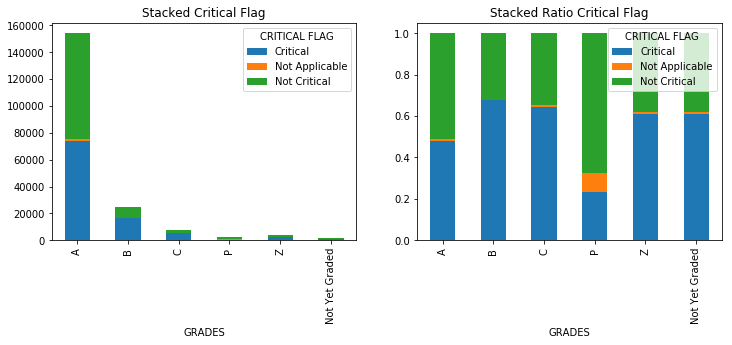

In [34]:
f = plt.figure(figsize = (12,4))
ax = f.add_subplot(1,2,1)
tab = pd.crosstab(my_data['CRITICAL FLAG'], my_data['GRADE'])
crit = tab[['A', 'B', 'C', 'P', 'Z', 'Not Yet Graded']].T
crit.plot.bar(stacked = True, ax = ax)
ax.set_title('Stacked Critical Flag')
ax.set_xlabel('GRADES')

sum_ = tmp_crit.sum(axis = 1)
for col in tmp_crit.columns:
    tmp_crit[col] = tmp_crit[col].divide(sum_)
ax = f.add_subplot(1,2,2)
tmp_crit.plot.bar(stacked = True, ax = ax)
ax.set_title('Stacked Ratio Critical Flag')
ax.set_xlabel('GRADES')

plt.show()